# Nashville Housing Dataset — Portfolio Project Introduction

## Data cleansing 

For this project, I analyzed a detailed housing dataset from Nashville, Tennessee, which includes property sale records and extensive information on property characteristics such as land use, sale price, foundation type, building value, and bedroom and bathroom counts. The data is sourced from official Nashville county property and tax records, providing a rich snapshot of the local real estate market. This project explores key trends and patterns in Nashville’s housing market, evaluates factors affecting property values, and demonstrates data cleansing, exploratory data analysis, and visualization skills. The dataset’s real-world complexity, including missing values and mixed data types, offers an excellent opportunity to showcase practical data science techniques.

In [1]:
# Load the dataset from GitHub

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import kagglehub

# This downloads the dataset and returns the path to the extracted directory
path = kagglehub.dataset_download("tmthyjames/nashville-housing-data")

# Now load the CSV using pandas
import pandas as pd
df = pd.read_csv(f"{path}/Nashville_housing_data_2013_2016.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


As we can see in our Data we have couple of issues. The first one is that we have some missing values in our data.We can deal with the Nan by either replacing them with some meaningful


1. The first thing we can do is to deal with all the missing values in our data. To do that we have many options. We can either drop the rows with missing values or fill them with some default value. We can first divide our data into their different classes or datatypes.


In [6]:
na = df.isna().sum()

print("Missing Values Table:")
display(na)

missing_counts = na[na > 0]

# Plot
plt.figure(figsize=(10, 6),dpi=1000)
sns.barplot(x=missing_counts.index, y=missing_counts.values, color='red')
plt.title('Count of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.xticks(rotation=45)
plt.show()

Missing Values Table:


Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

 NaNs can represent different things like data that was never recorded, data that doesn’t apply, or errors in data collection, and treating them improperly can lead to biased results or loss of important information. Dealing with NaNs is tricky because they can mean missing, irrelevant, or erroneous data, and mishandling them can cause misleading outcomes or the removal of useful information. Columns with few NaNs, such as "Property Address," can be reasonably filled or imputed using techniques like mode for categorical data or mean for numerical data. On the other hand, columns with a high number of NaNs, like "Suite/ Condo #", should be dropped if they contribute little to the analysis or can't be filled reliably, as keeping them may introduce unnecessary noise or bias into the dataset. For this project, we take a practical approach: we drop rows where the number of missing values exceeds 30,000 to eliminate incomplete records, we fill in missing values for columns with fewer than 150 NaNs using appropriate methods (mean for numerical, mode for categorical), and we drop the unnecessary index columns 'Unnamed: 0.1' and 'Unnamed: 0', as well as the entire 'Suite/ Condo #' column due to its excessive missing values. This strategy aims to preserve as much meaningful data as possible while ensuring the dataset remains clean and reliable for analysis.

In [3]:
# Drop unnecessary columns first
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Suite/ Condo   #'])

# Find columns with lots of NaNs
cols_with_many_nans = df.columns[df.isna().sum() > 30000]

# Drop rows that have NaNs in these problematic columns only
for col in cols_with_many_nans:
    df = df[df[col].notna()]

# Fill columns with fewer than 150 NaNs
for col in df.columns:
    n_missing = df[col].isna().sum()
    if 0 < n_missing < 150:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

# Now drop any rows that still have NaNs (optional)
df


,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,93736,20130118-0006110,No,No,"MILLER, JORDAN",...,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,ANTIOCH,2016-10-13,185000,20161019-0110290,No,No,"GOODWIN, BENJAMIN DAVIS & SAMUEL GORDON DAVIS",...,105000.0,130000.0,1758.00000,CRAWL,1996.0,BRICK/FRAME,C,3.0,2.0,0.0
56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,2016-10-26,214000,20161102-0115842,No,No,"FREO TENNESSEE, LLC",...,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,2016-10-28,236000,20161031-0114817,No,No,"CHHAY, CHOWAN & NIM, PHALLY",...,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,2016-10-28,466000,20161102-0115988,No,No,"GLAUS, WILLIAM D. SR.",...,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0


To enhance the efficiency and clarity of the dataset, we performed data type conversions based on the nature of each column. These changes help reduce memory usage, improve processing speed, and ensure appropriate handling of missing values or categorical information.

🔁 1. Conversion of Object Columns to Category
Several columns contained a limited number of unique string values that represent categories rather than free-form text. These include:
Land Use, Property City, Sold As Vacant, Multiple Parcels Involved in Sale, State, Tax District, Foundation Type, Exterior Wall, Grade
These columns were converted from object to category.

Columns such as:Neighborhood, Year Built, Bedrooms, Full Bath, Half Bath contained integer-like values but were stored as float64, likely to accommodate missing values (NaN). To retain integer semantics while handling missing values correctly, these were converted to Int64 — pandas' nullable integer type:

In [16]:
#df.isna().sum()

# Converting the 'Sales Date' as a Datetype object

df['Sale Date'] = pd.to_datetime(df['Sale Date'])

categorical_cols = [
    'Land Use', 'Property City', 'Sold As Vacant',
    'Multiple Parcels Involved in Sale', 'State',
    'Tax District', 'Foundation Type', 'Exterior Wall',
    'Grade'
]

df[categorical_cols] = df[categorical_cols].astype('category')

int_cols = ['Neighborhood', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']
df[int_cols] = df[int_cols].astype('Int64')  



df.dtypes





Parcel ID                                    object
Land Use                                   category
Property Address                             object
Property City                              category
Sale Date                            datetime64[ns]
Sale Price                                    int64
Legal Reference                              object
Sold As Vacant                             category
Multiple Parcels Involved in Sale          category
Owner Name                                   object
Address                                      object
City                                         object
State                                      category
Acreage                                     float64
Tax District                               category
Neighborhood                                  Int64
image                                        object
Land Value                                  float64
Building Value                              float64
Total Value 

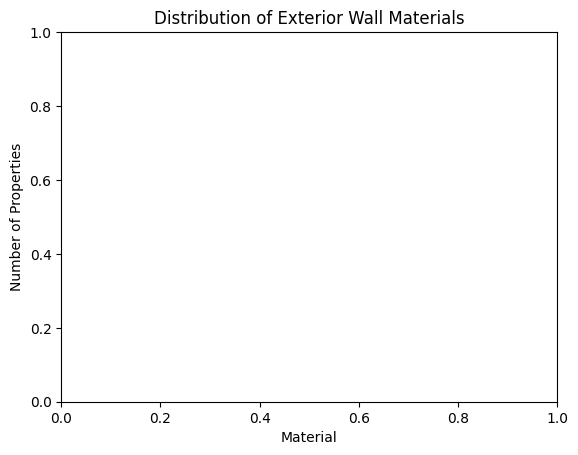

In [7]:
## Visualization

plt.title("Distribution of Exterior Wall Materials")
plt.xlabel("Material")
plt.ylabel("Number of Properties")
plt.show()

In [14]:

df.dtypes




Parcel ID                                    object
Land Use                                     object
Property Address                             object
Property City                                object
Sale Date                            datetime64[ns]
Sale Price                                    int64
Legal Reference                              object
Sold As Vacant                               object
Multiple Parcels Involved in Sale            object
Owner Name                                   object
Address                                      object
City                                         object
State                                        object
Acreage                                     float64
Tax District                                 object
Neighborhood                                float64
image                                        object
Land Value                                  float64
Building Value                              float64
Total Value 

One way to deal with missing value numerical data is to either replace the mean or to 